In [1]:
import hw1_v3 as hw1
import yahoofinancials as yfs
import yfinance as yf
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
import scipy.optimize as optimize
import os
import tabula 
import pandas as pd
import JT_2 as JT


import Hull_imlied_pds as hull

***


## Companies: GE, AAPL, TSLA, MSFT,  GS

### 1. Take credit issuers you were assigned and perform the following steps:
- Find their public ratings from major providers – lookup PD’s for one year, also look up cumulative PD’s for each of the ratings over 5-year time periods

- Calculate their Altman’s Z scores based on available data – does Z score agree with public ratings? What would you change based on this information?

- Perform Merton model analysis on each of the issuers, calculate their DD’s and implied PD’s over 5 years

- Obtain credit spreads for each of the issuers, calculate and draw default intensity step term structure (using Hull approach) – is it different from above steps, why?

- Calculate implied JT-model π’s from the generic issuer with the same rating (i.e. look at generic 5-yr spread for issuer in the same rating category, solve back for π using 5-year cumulative transition matrix), apply those π’s to your issuers PD’s calculated from Hull above, then – what should their 5-year credit spreads be? Are they consistent with the market pricing? Why yes, or why no?

### 2. Compare PD’s from each of the steps above; write about how you would you use these estimates together
### 3. Write up your findings in the clear concise summary



***

# Reading data

### Risk Free Rates

- Risk free rates can be find [here](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2019).
- OAS of companies can be find [here](https://fred.stlouisfed.org/series/BAMLC0A1CAAA).

In [2]:
rf_df = np.array([1.59 , 1.62, 1.59,1.6, 1.61])
rf_df =rf_df/100
rf_df

array([0.0159, 0.0162, 0.0159, 0.016 , 0.0161])

In [3]:
ge_oas_df = pd.read_csv("BAMLC0A4CBBB.csv")
ge_spread = np.array(ge_oas_df[-5:]["BAMLC0A4CBBB"])/100
ge_spread

array([0.02049385, 0.02111756, 0.01463   , 0.01486628, 0.01632967])

In [4]:
aapl_oas_df = pd.read_csv("BAMLC0A2CAA.csv")
aapl_spread = np.array(aapl_oas_df[-5:]["BAMLC0A2CAA"])/100
aapl_spread

array([0.00917846, 0.00915076, 0.00696577, 0.00680498, 0.00675072])

In [5]:
tsla_oas_df = pd.read_csv("BAMLH0A3HYC.csv")
tsla_spread = np.array(tsla_oas_df[-5:]["BAMLH0A3HYC"])/100
tsla_spread

array([0.10980423, 0.14365344, 0.08599885, 0.07666398, 0.09714641])

In [6]:
msft_oas_df = pd.read_csv("BAMLC0A1CAAA.csv")
msft_spread = np.array(msft_oas_df[-5:]["BAMLC0A1CAAA"])/100
msft_spread

array([0.00749808, 0.00799847, 0.00659115, 0.00605479, 0.00651005])

In [7]:
gs_oas_df = pd.read_csv("BAMLC0A3CA.csv")
gs_spread = np.array(gs_oas_df[-5:]["BAMLC0A3CA"])/100
gs_spread

array([0.01153615, 0.01221374, 0.00913923, 0.00937356, 0.00975359])

## Altman's Z
- X1 – Working Capital / Total Assets
- X2 – Retained Earnings since Inception / Total Assets 
- X3 – Profit Before Interest and Tax / Total Assets
- X4 – Market Value of Equity / Book Value of Total Debt 
- X5 – Sales / Total Asset

Working Capital = Current Asset - Current Liabilities


The Z-score then leads to assessment of bankruptcy risk as Low (Z > 2.8), Moderate/Uncertain (1.8 < Z < 2.8), or Very High (Z < 1.8)


In [8]:
def get_equity_vol(ticker,start_date,end_date,interval):
    '''param ticker: could be list or string, could be one or multiple
       param start_date: in format 'YYYY-MM-DD'
       param end_date: in format 'YYYY-MM-DD'
       param interval: valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    '''
    
    return yf.download(tickers=ticker,start=start_date, end=end_date,interval=interval)[
        'Adj Close'].pct_change().std()*np.sqrt(252)
    

In [9]:
tickers=["AAPL","GE","TSLA","MSFT","GS"]
start="2018-10-01"
end="2019-10-01"
interval='1d'

vol = get_equity_vol(ticker=tickers,start_date=start,end_date=end,interval=interval)

[*********************100%***********************]  5 of 5 downloaded


In [10]:
vol

AAPL    0.320813
GE      0.462401
GS      0.280134
MSFT    0.269190
TSLA    0.518855
dtype: float64

In [11]:
# def bond_ytm(price, par, t, coup, freq=2, guess=0.05):
#     freq = float(freq)
#     periods = t*freq
#     coupon = coup/100.*par/freq
#     dt = [(i+1)/freq for i in range(int(periods))]
#     ytm_func = lambda y: sum([coupon/(1+y/freq)**(freq*t) for t in dt]) + par/(1+y/freq)**(freq*t) - price
        
#     return optimize.newton(ytm_func, guess) 

**Note**:

- Used 1 yr of stock prices (from 2018-10-1 to 2019-10-1)
- Annulized volatility



# 1. AAPL


## 1.0 PD, Conditional PD...


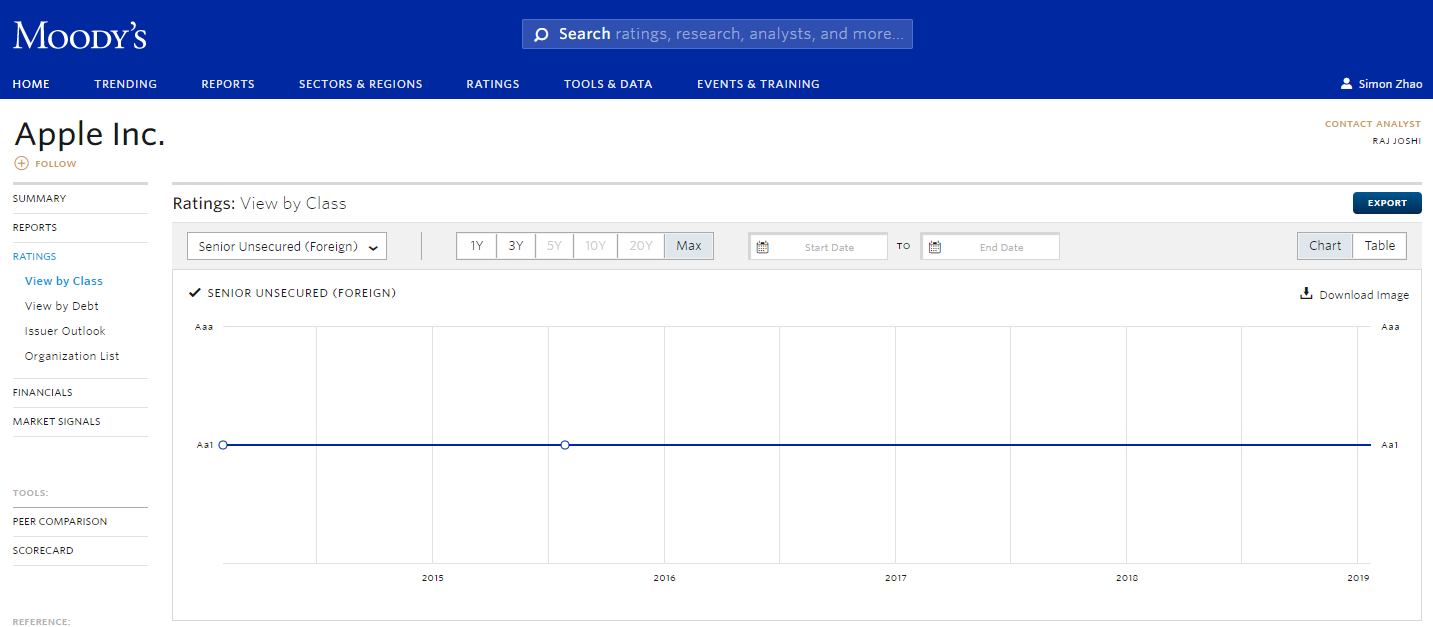
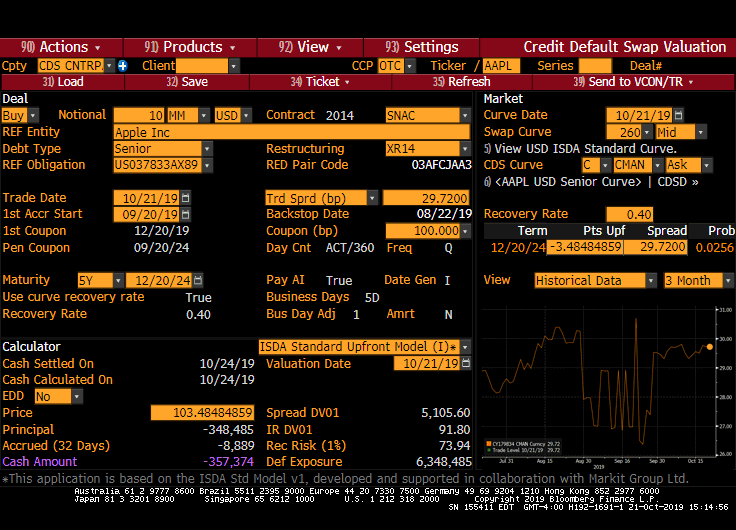

In [12]:

aapl_totalAsset = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['totalAssets'];

aapl_totalCurrLib = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['totalCurrentLiabilities'];

aapl_totalCurrAsset = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['totalCurrentAssets'];

aapl_RetainedEarning = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['retainedEarnings'];

aapl_EBIT = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','income')\
["incomeStatementHistory"]["AAPL"][0]['2018-09-29']['ebit']

aapl_mkt_val = yfs.YahooFinancials('AAPL').get_market_cap()

aapl_sales = yfs.YahooFinancials('AAPL').get_total_revenue()


In [13]:
# Working Capital
aapl_working_cap = aapl_totalCurrAsset-aapl_totalCurrLib
aapl_working_cap

14473000000

In [14]:
# Book Value of Debt

aapl_longtermDebt = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['longTermDebt'];

aapl_accountsPayable = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['accountsPayable'];

aapl_book_val_debt = aapl_accountsPayable+aapl_longtermDebt+aapl_totalCurrLib

**Note:**
- Book Value of Debt = Long Term Debt + Notes Payable + Current Portion of Long-Term Debt
- I used _accountsPayable_ as  _Notes Payable_
- _Total current debt_ as _Curent Portion of Long-Term Debt_

## 1.1 Altman's Z

In [15]:
aapl_altman_z=hw1.calc_altman_z(total_assets=aapl_totalAsset,
                                working_capital=aapl_working_cap,
                                retained_earnings=aapl_RetainedEarning,
                                ebit=aapl_EBIT,
                                mv_equity=aapl_mkt_val,
                                sales=aapl_sales,
                               book_value_debt=aapl_book_val_debt)
aapl_altman_z

5.4576780977069905

Z > 2.8, bankruptcy risk is low.

## 1.2 Merton

In [16]:
aapl_totalLib = yfs.YahooFinancials('AAPL').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["AAPL"][0]['2018-09-29']['totalLiab'];


In [17]:
dict_profile = {}
for num in range(1, 6):
    aapl_DD_Merton,aapl_PD_Merton =hw1.calc_prob_default(assets=aapl_totalAsset,
                                                         equity=aapl_mkt_val,
                                                         debt=aapl_totalLib,
                                                         t=num,
                                                         equity_vol=vol['AAPL'],
                                                         rf=0.0173)
    dict_profile.update({num: (aapl_DD_Merton, aapl_PD_Merton)})
    
dict_profile

{1: (1.654047581454325, 0.04905892267728175),
 2: (3.5334190975576454, 0.00020511080962098654),
 3: (3.4973889521884103, 0.00023491813621676075),
 4: (2.982675839275498, 0.0014287022841618965),
 5: (2.6213798981171688, 0.00437873065255329)}

## 1.3 JT

In [18]:
aapl_risk_neutral_transition,aapl_pi = JT.solve_pi(spread=aapl_spread, 
                                                   rf_rates=rf_df, 
                                                   lst_transitions=JT.transitions_matrices, 
                                                   rating='AA')

In [19]:
aapl_risk_neutral_transition

[array([2.81924157e-03, 9.27038028e-01, 4.42620926e-02, 2.76285674e-03,
        2.81924157e-04, 3.38308988e-04, 1.12769663e-04]),
 array([2.44348004e-03, 9.32411597e-01, 3.81502866e-02, 3.63613102e-03,
        5.67236438e-04, 4.07246674e-04, 7.27226203e-05]),
 array([1.76690007e-03, 9.49793085e-01, 2.75217147e-02, 3.00971962e-03,
        5.09106801e-04, 3.29422048e-04, 4.49211883e-05]),
 array([1.48049472e-03, 9.53925210e-01, 2.39570963e-02, 3.12361953e-03,
        5.10322042e-04, 3.30868137e-04, 3.92555417e-05]),
 array([1.31709424e-03, 9.56129936e-01, 2.19575849e-02, 3.21154487e-03,
        5.14208027e-04, 3.33784158e-04, 3.60847738e-05])]

In [20]:
pd.DataFrame(aapl_risk_neutral_transition)

0         1         2         3         4         5         6
0  0.002819  0.927038  0.044262  0.002763  0.000282  0.000338  0.000113
1  0.002443  0.932412  0.038150  0.003636  0.000567  0.000407  0.000073
2  0.001767  0.949793  0.027522  0.003010  0.000509  0.000329  0.000045
3  0.001480  0.953925  0.023957  0.003124  0.000510  0.000331  0.000039
4  0.001317  0.956130  0.021958  0.003212  0.000514  0.000334  0.000036

In [21]:
aapl_pi

[0.5638483136211859,
 0.2908904812599034,
 0.1497372944120704,
 0.11215869055562125,
 0.0902119345852562]

## 1.4 Bond 

# 2.  GE


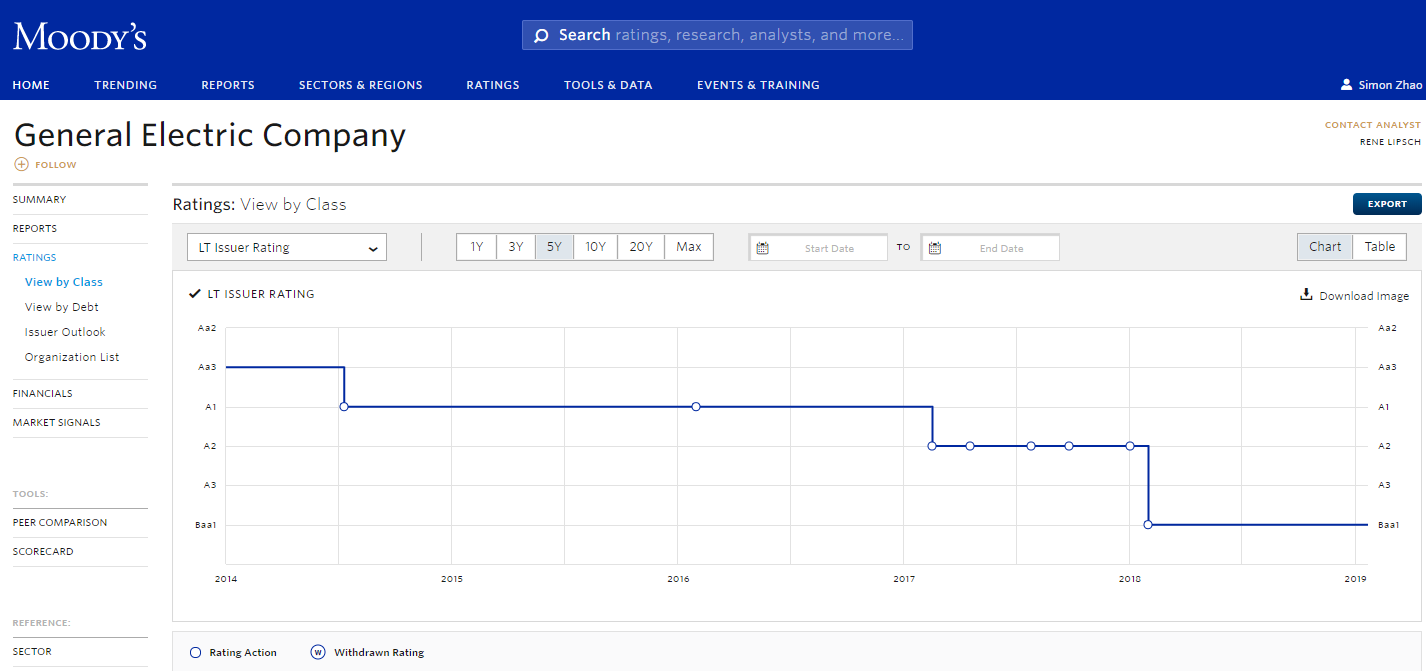
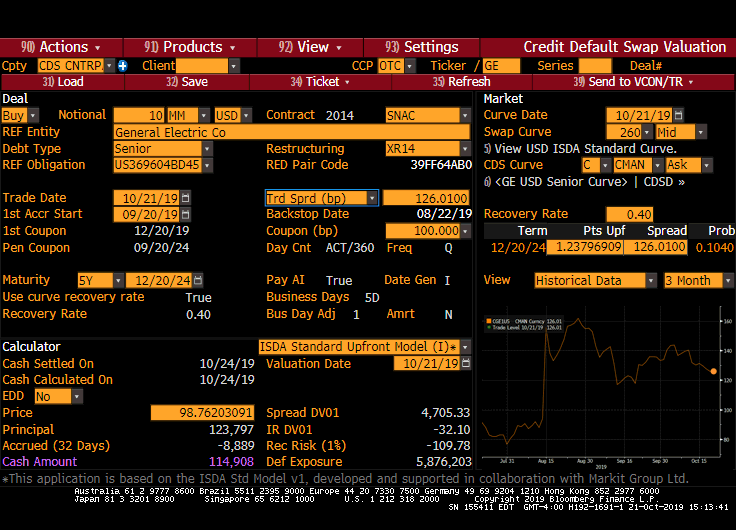

In [22]:
ge_totalAsset = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['totalAssets'];

ge_totalCurrLib = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['totalCurrentLiabilities'];

ge_totalCurrAsset = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['totalCurrentAssets'];

ge_RetainedEarning = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['retainedEarnings'];

ge_EBIT = yfs.YahooFinancials('GE').get_financial_stmts('annual','income')\
["incomeStatementHistory"]["GE"][0]['2018-12-31']['ebit']

ge_mkt_val = yfs.YahooFinancials('GE').get_market_cap()

ge_sales = yfs.YahooFinancials('GE').get_total_revenue()


In [23]:
# Working Capital
ge_working_cap = ge_totalCurrAsset-ge_totalCurrLib
ge_working_cap

46037000000

In [24]:
# Book Value of Debt

ge_longtermDebt = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['longTermDebt'];

ge_accountsPayable = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['accountsPayable'];

ge_book_val_debt = ge_accountsPayable+ge_longtermDebt+ge_totalCurrLib

## 2.1 Altman's Z

In [25]:
ge_altman_z=hw1.calc_altman_z(total_assets=ge_totalAsset,
                                working_capital=ge_working_cap,
                                retained_earnings=ge_RetainedEarning,
                                ebit=ge_EBIT,
                                mv_equity=ge_mkt_val,
                                sales=ge_sales,
                                book_value_debt=ge_book_val_debt)
ge_altman_z

1.409350822405921

Z < 1.8, bankruptcy risk is high.

## 2.2 Merton

In [26]:
ge_totalLib = yfs.YahooFinancials('GE').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GE"][0]['2018-12-31']['totalLiab'];

ge_volume = yfs.YahooFinancials('GE').get_current_volume()

In [27]:
ge_dict_profile = {}
for num in range(1, 6):
    ge_DD_Merton,ge_PD_Merton =hw1.calc_prob_default(assets=ge_totalAsset,
                                                         equity=ge_mkt_val,
                                                         debt=ge_totalLib,
                                                         t=num,
                                                         equity_vol=vol['GE'],
                                                         rf=0.0173)
    ge_dict_profile.update({num: (ge_DD_Merton, ge_PD_Merton)})
    
ge_dict_profile

{1: (1.0620583412441733, 0.1441046002766166),
 2: (0.28175875374656895, 0.3890642498818217),
 3: (0.6479757463273036, 0.2585003186419357),
 4: (0.2897258448203504, 0.3860129913195373),
 5: (0.3646186223016192, 0.35769805596286586)}

## 2.3 JT

In [28]:
ge_risk_neutral_transition,ge_pi = JT.solve_pi(spread=ge_spread, 
                                               rf_rates=rf_df, 
                                               lst_transitions=JT.transitions_matrices, 
                                               rating='BBB')

In [29]:
pd.DataFrame(ge_risk_neutral_transition)

0         1         2         3         4         5         6
0  0.000079  0.000712  0.027051  0.889581  0.028633  0.003638  0.000870
1  0.000065  0.000774  0.025232  0.894963  0.022866  0.004367  0.000839
2  0.000041  0.000550  0.016940  0.928915  0.014290  0.003201  0.000571
3  0.000033  0.000562  0.015302  0.932610  0.011882  0.003021  0.000537
4  0.000029  0.000618  0.015428  0.929514  0.011159  0.003150  0.000559

In [30]:
ge_pi

[0.7909674967639332,
 0.4302166514449231,
 0.20385666943750025,
 0.16287729878023452,
 0.14721457274288877]

# 3. TSLA

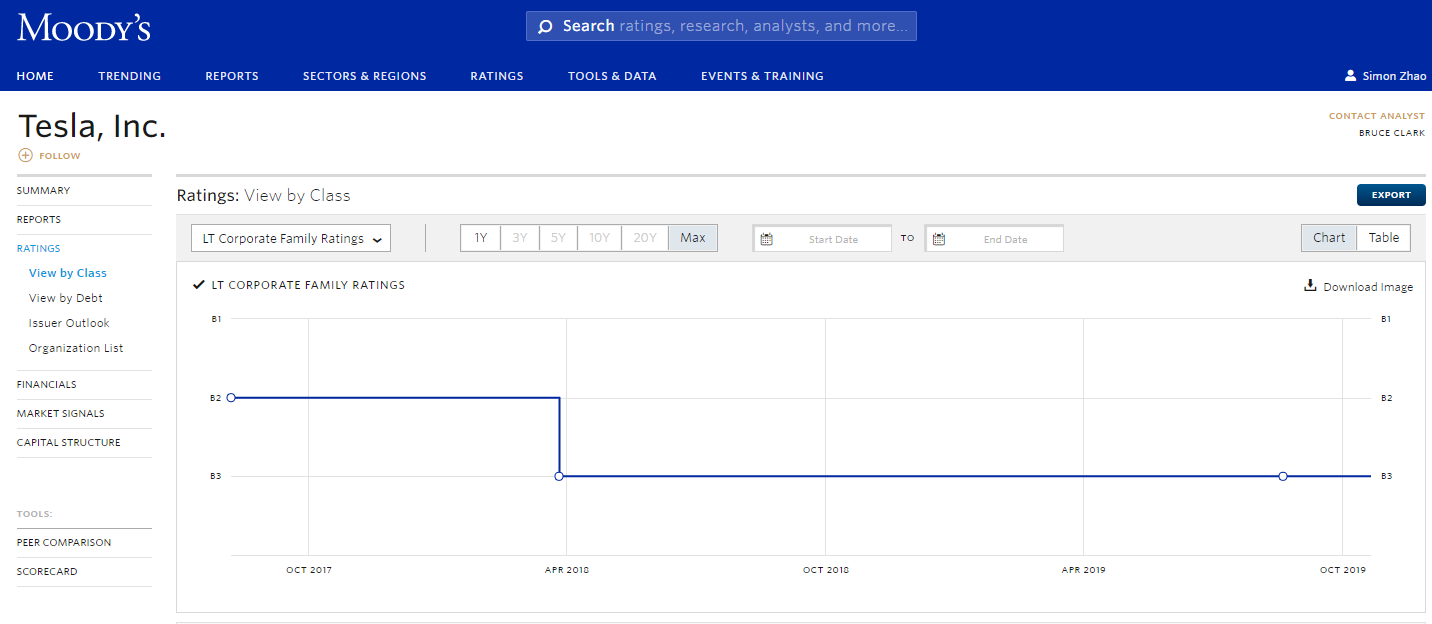

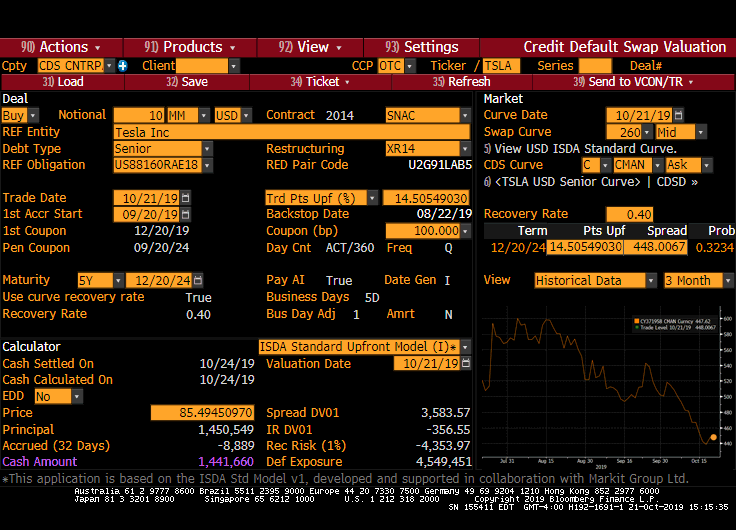

In [31]:
tsla_totalAsset = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['totalAssets'];

tsla_totalCurrLib = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['totalCurrentLiabilities'];

tsla_totalCurrAsset = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['totalCurrentAssets'];

tsla_RetainedEarning = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['retainedEarnings'];

tsla_EBIT = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','income')\
["incomeStatementHistory"]["TSLA"][0]['2018-12-31']['ebit']

tsla_mkt_val = yfs.YahooFinancials('TSLA').get_market_cap()

tsla_sales = yfs.YahooFinancials('TSLA').get_total_revenue()

In [32]:
# Working Capital
tsla_working_cap = tsla_totalCurrAsset-tsla_totalCurrLib
tsla_working_cap

-1685828000

In [33]:
# Book Value of Debt

tsla_longtermDebt = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['longTermDebt'];

tsla_accountsPayable = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['accountsPayable'];

tsla_book_val_debt = tsla_accountsPayable+tsla_longtermDebt+tsla_totalCurrLib

## 3.1 Altman's Z

In [34]:
tsla_altman_z=hw1.calc_altman_z(total_assets=tsla_totalAsset,
                                working_capital=tsla_working_cap,
                                retained_earnings=tsla_RetainedEarning,
                                ebit=tsla_EBIT,
                                mv_equity=tsla_mkt_val,
                                sales=tsla_sales,
                                book_value_debt=tsla_book_val_debt)
tsla_altman_z

2.179009261924065

1.8 < Z < 2.8, bankruptcy risk is moderate.

## 3.2 Merton

In [35]:
tsla_totalLib = yfs.YahooFinancials('TSLA').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["TSLA"][0]['2018-12-31']['totalLiab'];

tsla_volume = yfs.YahooFinancials('TSLA').get_current_volume()

In [36]:
tsla_dict_profile = {}
for num in range(1, 6):
    tsla_DD_Merton,tsla_PD_Merton =hw1.calc_prob_default(assets=tsla_totalAsset,
                                                         equity=tsla_mkt_val,
                                                         debt=tsla_totalLib,
                                                         t=num,
                                                         equity_vol=vol['TSLA'],
                                                         rf=0.0173)
    tsla_dict_profile.update({num: (tsla_DD_Merton, tsla_PD_Merton)})
    
tsla_dict_profile

{1: (1.3223527812824256, 0.09302535227852987),
 2: (1.1941757493743776, 0.11620461356533784),
 3: (1.296019481938486, 0.09748438651626179),
 4: (1.1238914447952975, 0.13052954056840776),
 5: (0.9130579356369937, 0.18060603595616842)}

## 3.3 JT

In [37]:
tsla_risk_neutral_transition,tsla_pi = JT.solve_pi(spread=tsla_spread, 
                                                   rf_rates=rf_df, 
                                                   lst_transitions=JT.transitions_matrices, 
                                                   rating='CCC/C')

In [38]:
pd.DataFrame(tsla_risk_neutral_transition)

0    1         2         3         4         5         6
0  0.0  0.0  0.000633  0.001151  0.003395  0.076011  0.674954
1  0.0  0.0  0.000660  0.002226  0.005992  0.083799  0.597686
2  0.0  0.0  0.000361  0.001694  0.004414  0.047974  0.750443
3  NaN  NaN       NaN       NaN       NaN       NaN       NaN
4  NaN  NaN       NaN       NaN       NaN       NaN       NaN

# 4. MSFT

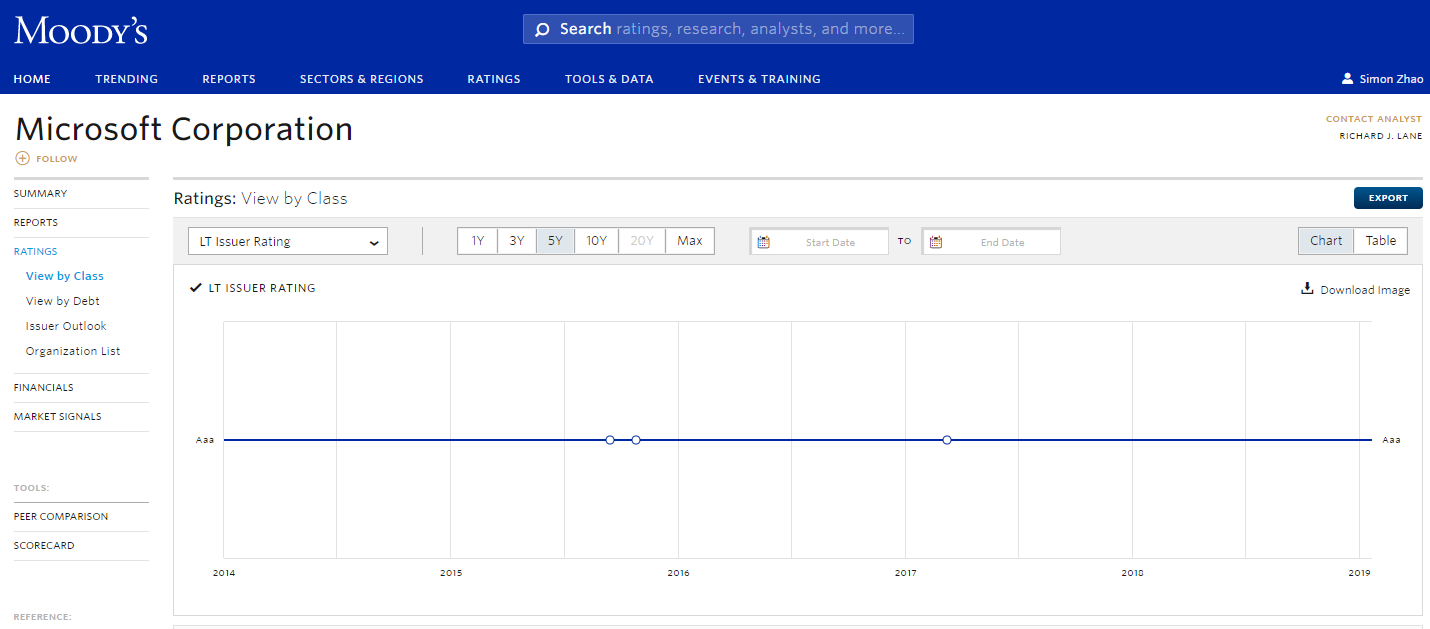
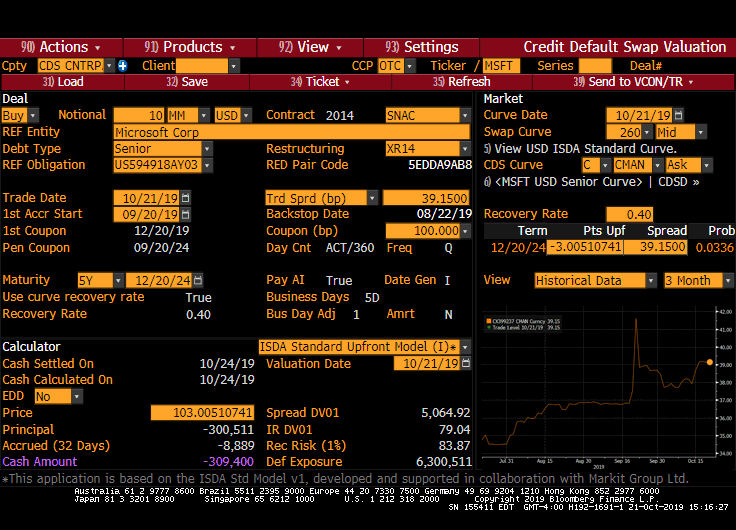

In [39]:
msft_totalAsset = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['totalAssets'];

msft_totalCurrLib = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['totalCurrentLiabilities'];

msft_totalCurrAsset = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['totalCurrentAssets'];

msft_RetainedEarning = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['retainedEarnings'];

msft_EBIT = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','income')\
["incomeStatementHistory"]["MSFT"][0]['2019-06-30']['ebit']

msft_mkt_val = yfs.YahooFinancials('MSFT').get_market_cap()
msft_sales = yfs.YahooFinancials('MSFT').get_total_revenue()


In [40]:
# Working Capital
msft_working_cap = msft_totalCurrAsset-msft_totalCurrLib
msft_working_cap

106132000000

In [41]:
# Book Value of Debt

msft_longtermDebt = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['longTermDebt'];

msft_accountsPayable = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['accountsPayable'];

msft_book_val_debt = msft_accountsPayable+msft_longtermDebt+msft_totalCurrLib

## 4.1 Altman's Z

In [42]:
msft_altman_z=hw1.calc_altman_z(total_assets=msft_totalAsset,
                                working_capital=msft_working_cap,
                                retained_earnings=msft_RetainedEarning,
                                ebit=msft_EBIT,
                                mv_equity=msft_mkt_val,
                                sales=msft_sales,
                                book_value_debt=msft_book_val_debt)
msft_altman_z

8.581184691770158

Z > 2.8, bankruptcy risk is low.

## 4.2 Merton

In [43]:
msft_totalLib = yfs.YahooFinancials('MSFT').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["MSFT"][0]['2019-06-30']['totalLiab'];

msft_volume = yfs.YahooFinancials('MSFT').get_current_volume()

In [62]:
msft_dict_profile = {}
for num in range(1, 6):
    msft_DD_Merton,msft_PD_Merton =hw1.calc_prob_default(assets=msft_totalAsset,
                                                         equity=msft_mkt_val,
                                                         debt=msft_totalLib,
                                                         t=num,
                                                         equity_vol=vol['MSFT'],
                                                         rf=0.0173)
    msft_dict_profile.update({num: (msft_DD_Merton, msft_PD_Merton)})
    
msft_dict_profile

{1: (1.8321667838628302, 0.03346328797805702),
 2: (4.991262384820376, 2.999297243700415e-07),
 3: (4.67967372799738, 1.4366590033606253e-06),
 4: (4.016267461260849, 2.9563574682924798e-05),
 5: (3.5593621739241965, 0.00018587828443246234)}

In [66]:
msft_dict_profile.values()

dict_values([(1.8321667838628302, 0.03346328797805702), (4.991262384820376, 2.999297243700415e-07), (4.67967372799738, 1.4366590033606253e-06), (4.016267461260849, 2.9563574682924798e-05), (3.5593621739241965, 0.00018587828443246234)])

## 4.3 JT

In [45]:
msft_risk_neutral_transition,msft_pi = JT.solve_pi(spread=msft_spread, 
                                                   rf_rates=rf_df, 
                                                   lst_transitions=JT.transitions_matrices, 
                                                   rating='AAA')

In [46]:
pd.DataFrame(msft_risk_neutral_transition)

0         1         2         3         4         5         6
0  0.924349  0.053031  0.003082  0.000291  0.000465  0.000174  0.000291
1  0.925519  0.049013  0.004490  0.000579  0.000422  0.000172  0.000282
2  0.940236  0.038363  0.004042  0.000553  0.000328  0.000138  0.000225
3  0.949755  0.030040  0.004215  0.000661  0.000254  0.000142  0.000124
4  0.948982  0.028963  0.004847  0.000808  0.000242  0.000162  0.000081

In [47]:
msft_pi

[0.581479957314975,
 0.3128804253310478,
 0.17272700964585833,
 0.11805766740819085,
 0.10098524428489435]

# 5. GS

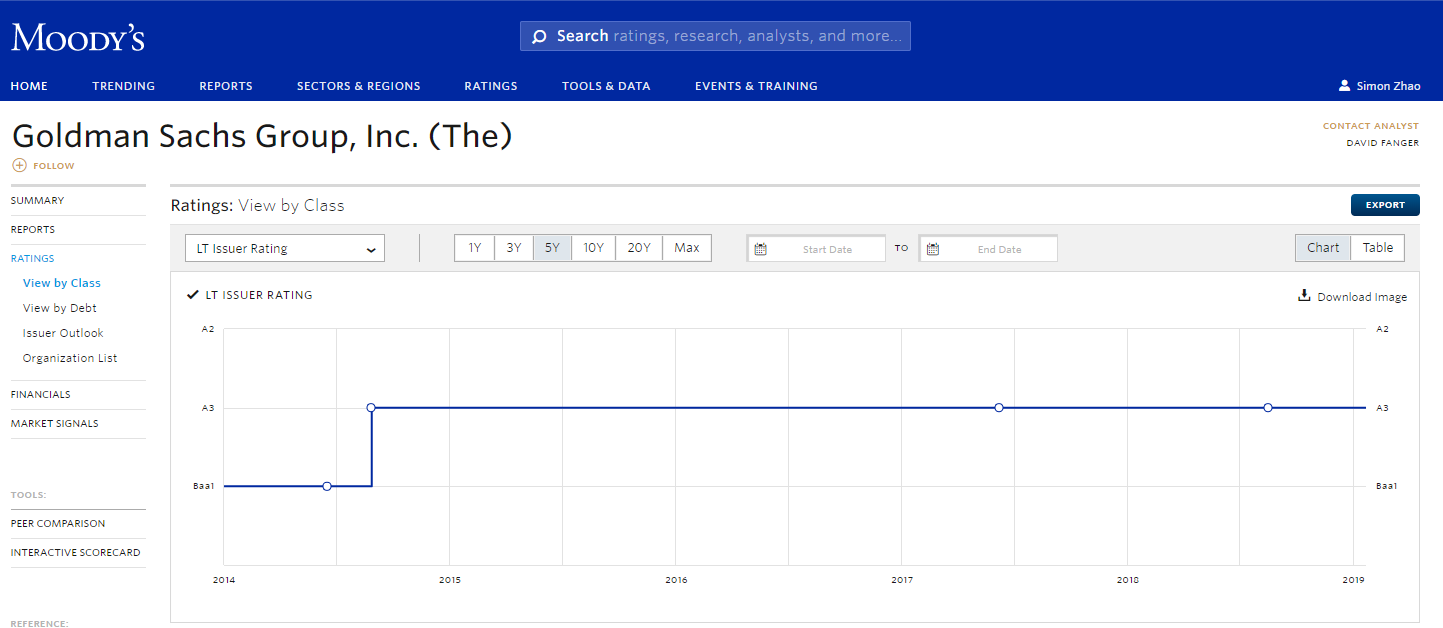
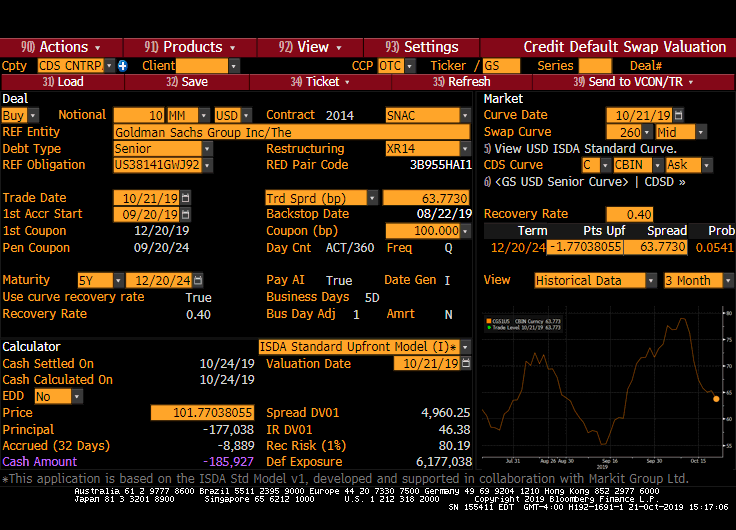


In [48]:
gs_totalAsset = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['totalAssets'];

gs_totalCurrLib = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['totalCurrentLiabilities'];

gs_totalCurrAsset = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['totalCurrentAssets'];

gs_RetainedEarning = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['retainedEarnings'];

gs_EBIT = yfs.YahooFinancials('GS').get_financial_stmts('annual','income')\
["incomeStatementHistory"]["GS"][0]['2018-12-31']['ebit']

gs_mkt_val = yfs.YahooFinancials('GS').get_market_cap()

gs_sales = yfs.YahooFinancials('GS').get_total_revenue()

In [49]:
# Working Capital
gs_working_cap = gs_totalCurrAsset-gs_totalCurrLib
gs_working_cap

427413000000

In [50]:
# Book Value of Debt

gs_longtermDebt = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['longTermDebt'];

gs_accountsPayable = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['accountsPayable'];

gs_book_val_debt = gs_accountsPayable+gs_longtermDebt+gs_totalCurrLib

## 5.1 Altman's Z

In [51]:
gs_altman_z=hw1.calc_altman_z(total_assets=gs_totalAsset,
                                working_capital=gs_working_cap,
                                retained_earnings=gs_RetainedEarning,
                                ebit=gs_EBIT,
                                mv_equity=gs_mkt_val,
                                sales=gs_sales,
                                book_value_debt=gs_book_val_debt)
gs_altman_z

0.808012313162223

Z < 1.8, bankruptcy risk is high.

## 5.2 Merton

In [52]:
gs_totalLib = yfs.YahooFinancials('GS').get_financial_stmts('annual','balance')\
["balanceSheetHistory"]["GS"][0]['2018-12-31']['totalLiab'];

gs_volume = yfs.YahooFinancials('GS').get_current_volume()

In [53]:
gs_dict_profile = {}
for num in range(1, 6):
    gs_DD_Merton,gs_PD_Merton =hw1.calc_prob_default(assets=gs_totalAsset,
                                                         equity=gs_mkt_val,
                                                         debt=gs_totalLib,
                                                         t=num,
                                                         equity_vol=vol['GS'],
                                                         rf=0.0173)
    gs_dict_profile.update({num: (gs_DD_Merton, gs_PD_Merton)})
    
gs_dict_profile

{1: (1.1530271098324454, 0.12444962869303666),
 2: (0.26283543823441036, 0.3963387098940684),
 3: (2.401765094313421, 0.008158091094627298),
 4: (1.8434665448848597, 0.03263046098777749),
 5: (1.5479183718030105, 0.06082097539033652)}

## 5.3 JT

In [54]:
gs_risk_neutral_transition,gs_pi = JT.solve_pi(spread=gs_spread, 
                                               rf_rates=rf_df, 
                                               lst_transitions=JT.transitions_matrices, 
                                               rating='AA')

In [55]:
pd.DataFrame(gs_risk_neutral_transition)

0         1         2         3         4         5         6
0  0.003535  0.908507  0.055504  0.003465  0.000354  0.000424  0.000141
1  0.003252  0.910057  0.050768  0.004839  0.000755  0.000542  0.000097
2  0.002313  0.934267  0.036032  0.003940  0.000667  0.000431  0.000059
3  0.002034  0.936693  0.032917  0.004292  0.000701  0.000455  0.000054
4  0.001897  0.936801  0.031632  0.004627  0.000741  0.000481  0.000052

In [56]:
gs_pi

[0.7070590693600683,
 0.38710204102899626,
 0.19604180853379552,
 0.1541066764775895,
 0.12995869776028157]

In [57]:
merton_dict = {'AAPL':aapl_PD_Merton,
              'GE':ge_PD_Merton,
              'TSLA':tsla_PD_Merton,
              'MSFT':msft_PD_Merton,
              'GS':gs_PD_Merton}

In [67]:
merton_pd_df = pd.DataFrame.from_dict(merton_dict)

ValueError: If using all scalar values, you must pass an index